In [3]:
#Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
from scipy import stats
import missingno as msno
import numpy as np

<h2>Data : https://www.kaggle.com/avikasliwal/used-cars-price-prediction <\h2>

In [4]:
#importing data
test= pd.read_csv("test-data.csv")
train = pd.read_csv("train-data.csv")

In [5]:
test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [242]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [243]:
test.shape

(1234, 13)

In [244]:
train.shape

(6019, 14)

In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
train=train.drop("Unnamed: 0",axis=1)

In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
Categorical_data = ["Name","Location","Year","Fuel_Type","Transmission","Owner_Type","Seats"]
Numerical_data = ["Kilometers_Driven","Price"]

train[Categorical_data]=train[Categorical_data].astype("category")
train[Numerical_data]=train[Numerical_data].astype("double")

In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   category
 1   Location           6019 non-null   category
 2   Year               6019 non-null   category
 3   Kilometers_Driven  6019 non-null   float64 
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   object  
 8   Engine             5983 non-null   object  
 9   Power              5983 non-null   object  
 10  Seats              5977 non-null   category
 11  New_Price          824 non-null    object  
 12  Price              6019 non-null   float64 
dtypes: category(7), float64(2), object(4)
memory usage: 426.0+ KB


In [250]:
train.describe()

,Kilometers_Driven,Price
count,6.019000e+03,6019.000000
mean,5.873838e+04,9.479468
std,9.126884e+04,11.187917
min,1.710000e+02,0.440000
25%,3.400000e+04,3.500000
50%,5.300000e+04,5.640000
75%,7.300000e+04,9.950000
max,6.500000e+06,160.000000


In [8]:
train = train.drop("New_Price",axis=1)

In [9]:
train=train.dropna()

<h1> Checking missing data<\h1>

<AxesSubplot:>

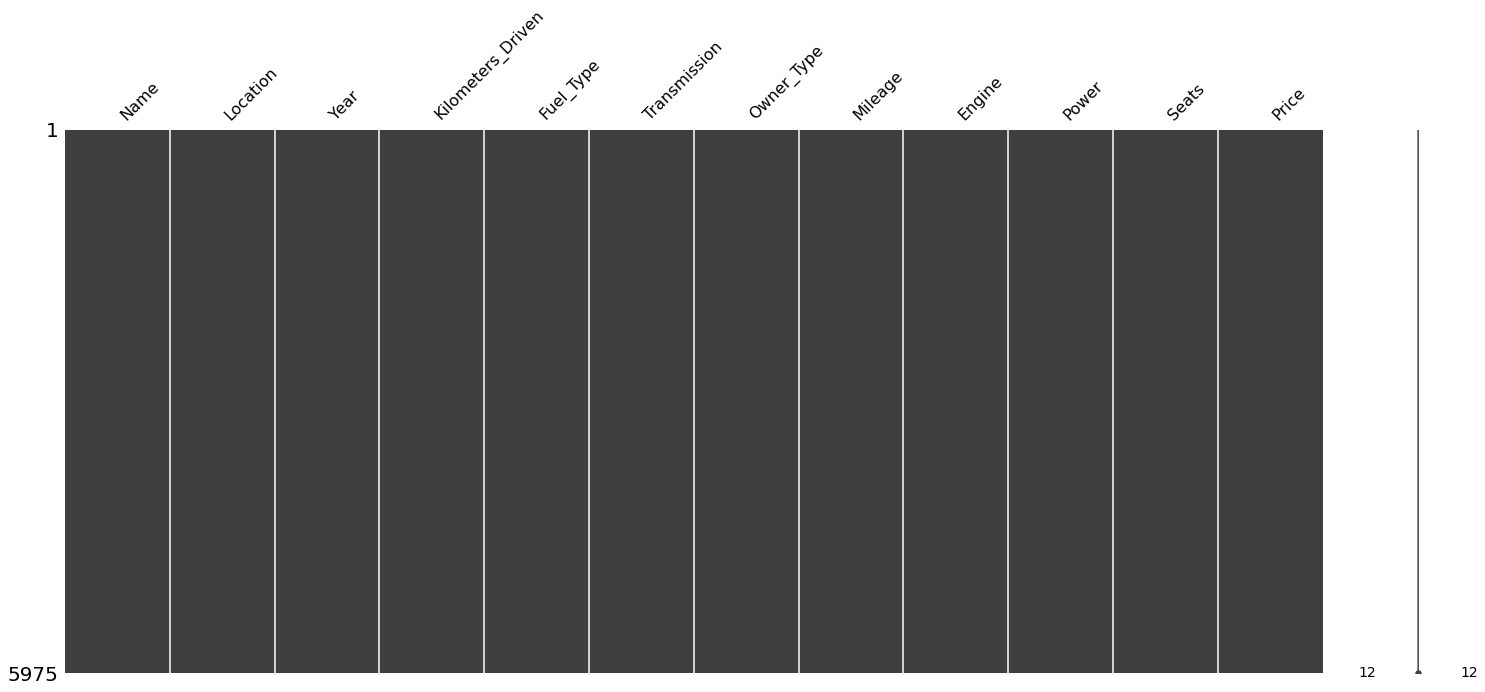

In [253]:
msno.matrix(train)

In [254]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<h1>Cleaning and typecasting obect type columns<\h1>

In [10]:
train["Mileage"] = train["Mileage"].map(lambda x: x.rstrip('kmplCgbhp/')).astype("float")
train["Engine"] = train["Engine"].map(lambda x: x.rstrip('kmplCgbhp/')).astype("float")

In [11]:
train["Power"] = train["Power"].map(lambda x: x.rstrip('kmplCgbhpnull /'))

In [12]:
train["Power"] = train["Power"].replace(r'^\s*$', np.NaN, regex=True)

In [13]:
train["Power"] = train["Power"].astype("float")

<AxesSubplot:>

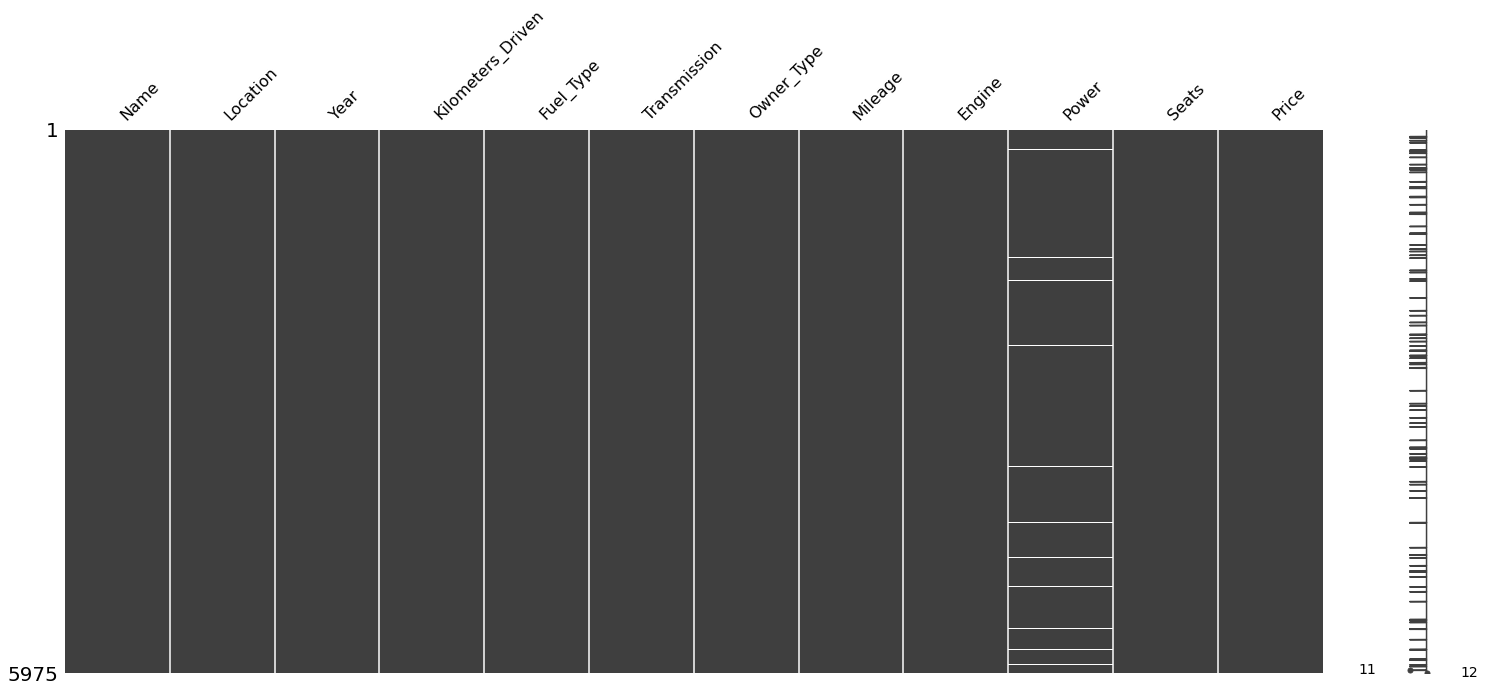

In [14]:
msno.matrix(train)

In [15]:
train = train.dropna()

In [16]:
train.describe()

,Kilometers_Driven,Mileage,Engine,Power,Price
count,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,5.831700e+04,18.277839,1625.745572,113.276894,9.603919
std,9.216941e+04,4.365657,601.641783,53.881892,11.249453
min,1.710000e+02,0.000000,624.000000,34.200000,0.440000
25%,3.342250e+04,15.260000,1198.000000,75.000000,3.517500
50%,5.260900e+04,18.200000,1495.500000,97.700000,5.750000
75%,7.240275e+04,21.100000,1991.000000,138.100000,10.000000
max,6.500000e+06,33.540000,5998.000000,560.000000,160.000000


<h1>Pairplot to verify the relations between numerical columns<\h1>

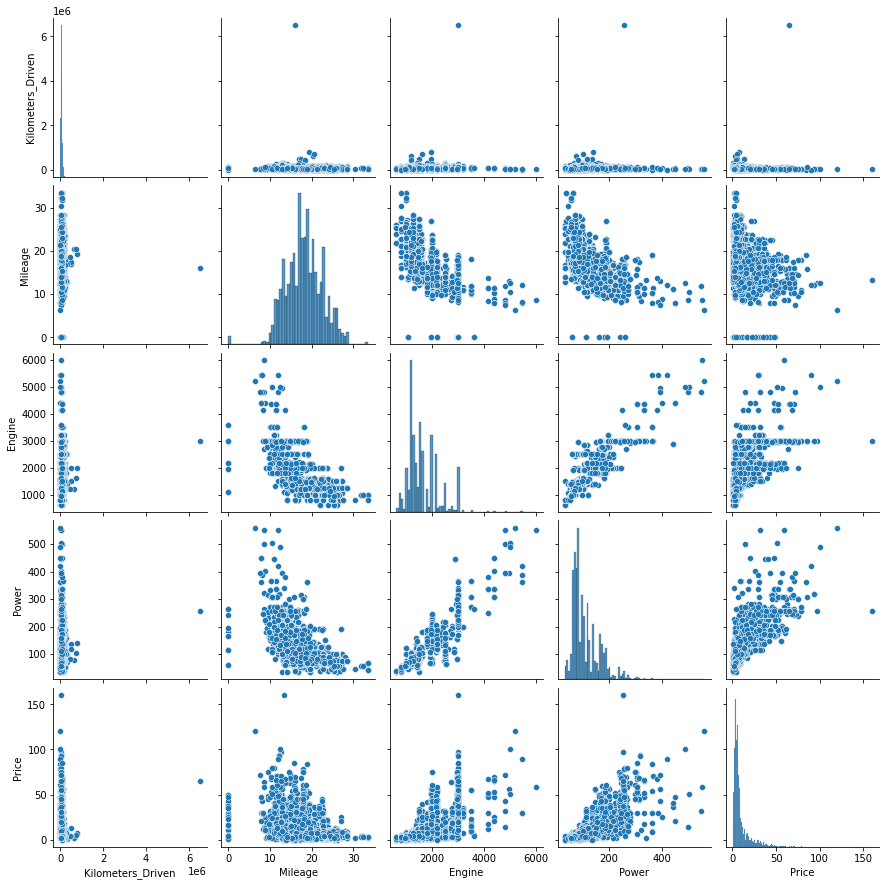

In [277]:
sns.pairplot(train)

<h1>Heatmap visualise corelation matrix of numerical columns<\h1>

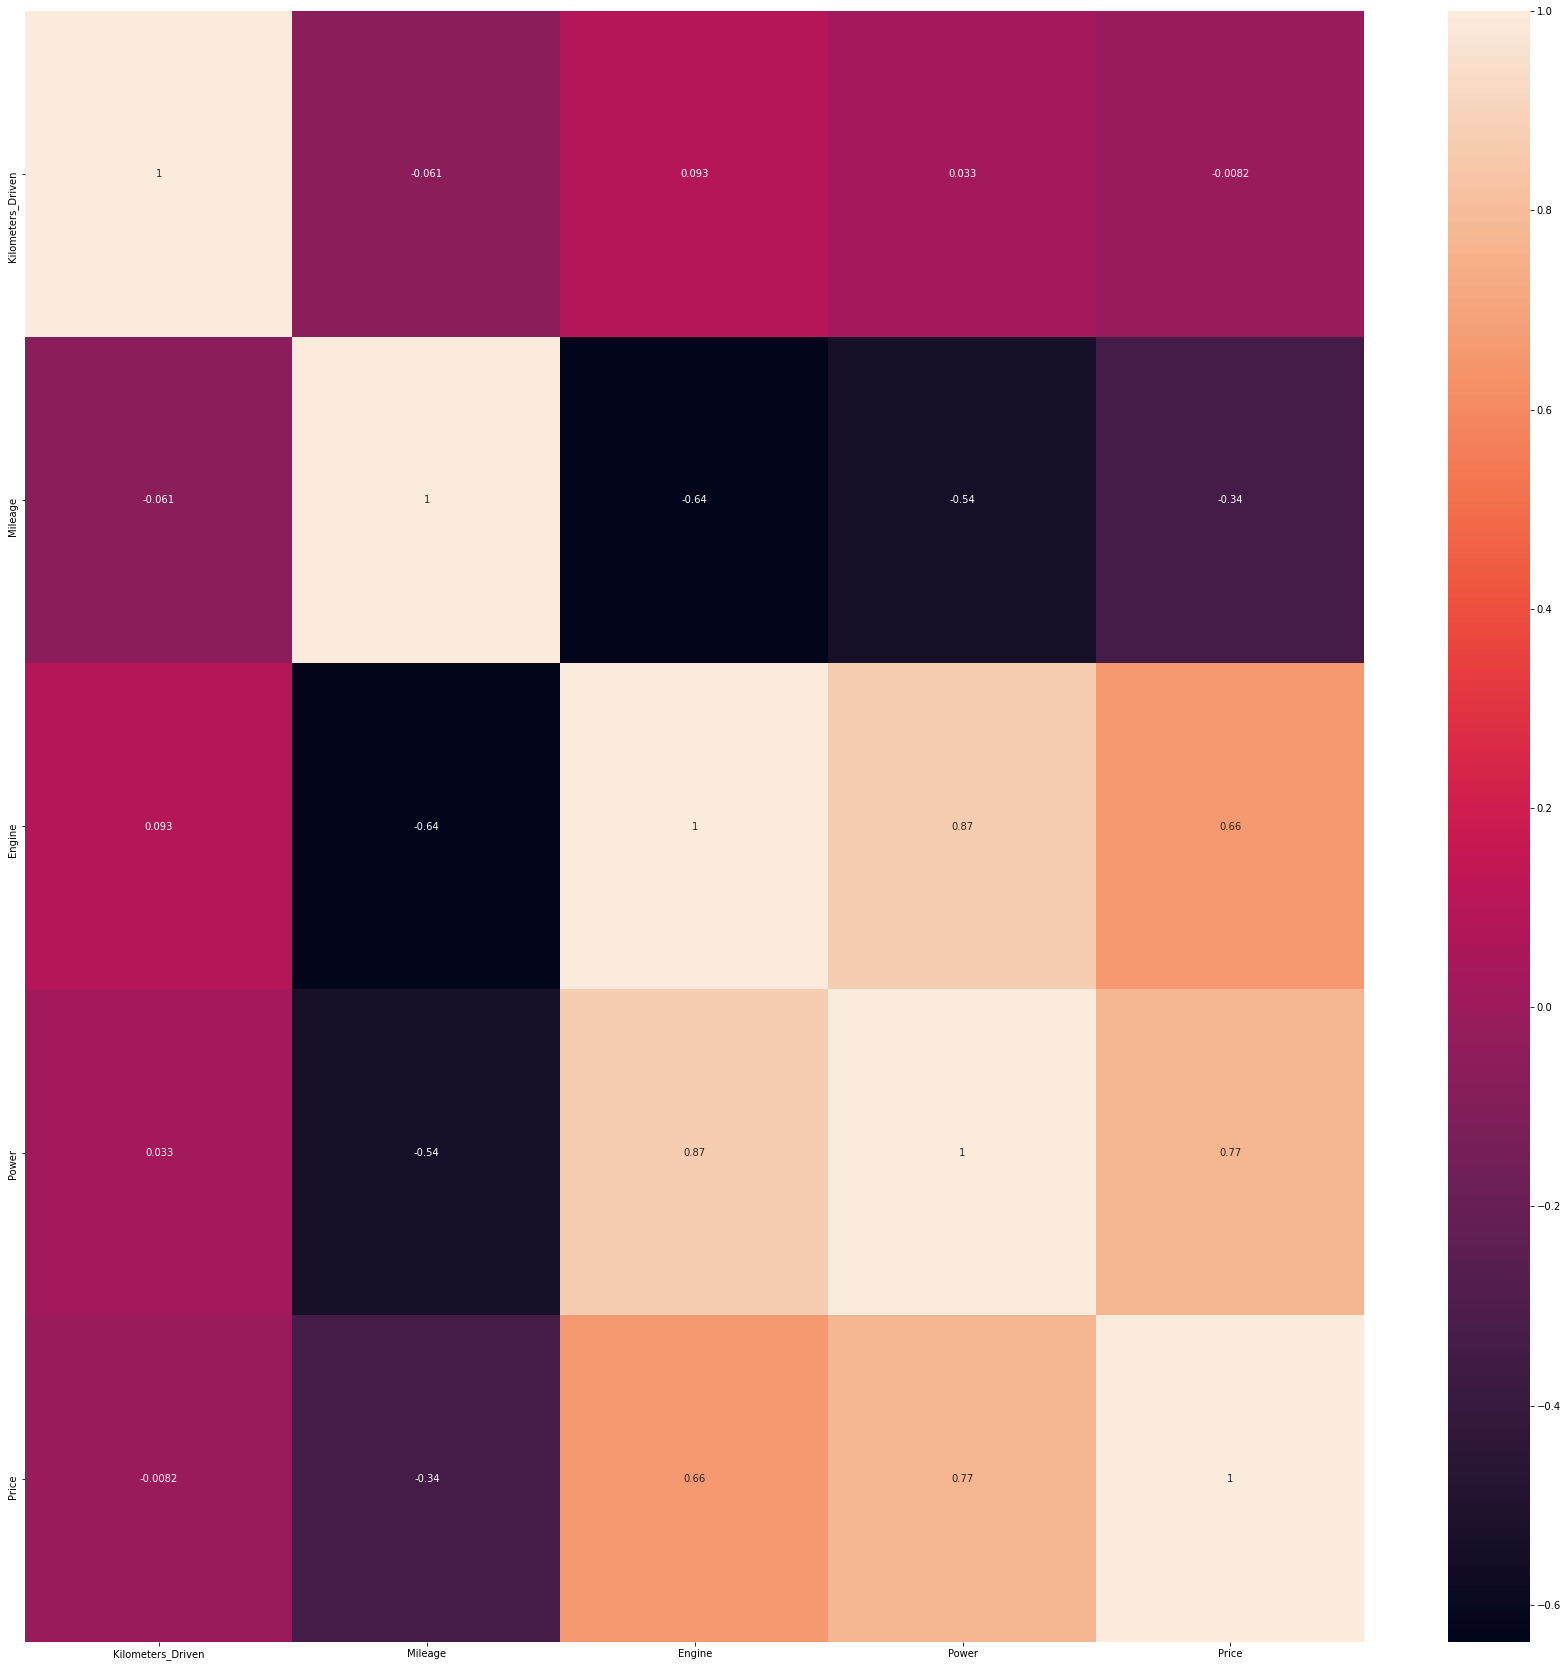

In [272]:
_=plt.figure(figsize=(30,30))
_=sns.heatmap(train.corr(),annot=True)
plt.show()

<h1>Frequency of cars model by year, Maximum car solds are between 2010 to 2018<\h1>

(array([   9.,   15.,   39.,  108.,  267.,  524., 1014., 1433., 1477.,
         986.]),
 array([1998. , 2000.1, 2002.2, 2004.3, 2006.4, 2008.5, 2010.6, 2012.7,
        2014.8, 2016.9, 2019. ]),
 <BarContainer object of 10 artists>)

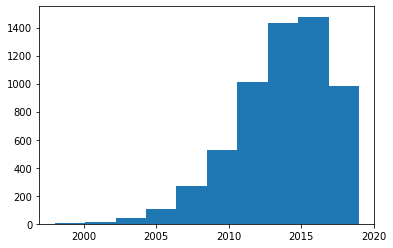

In [17]:
plt.hist(train.Year)

<h1>Price destribution of used car, Most cars are between 0 to 10 Lakh<\h1>

Text(0.5, 1.0, 'Price Histogram of cars')

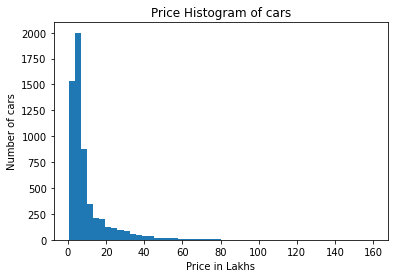

In [18]:
plt.hist(train.Price,bins=50)
plt.xlabel('Price in Lakhs')
plt.ylabel('Number of cars')
plt.title('Price Histogram of cars')

<h1>Number of cars in various location, Max: Mumbai, Min : Ahemdabaad<\h1>

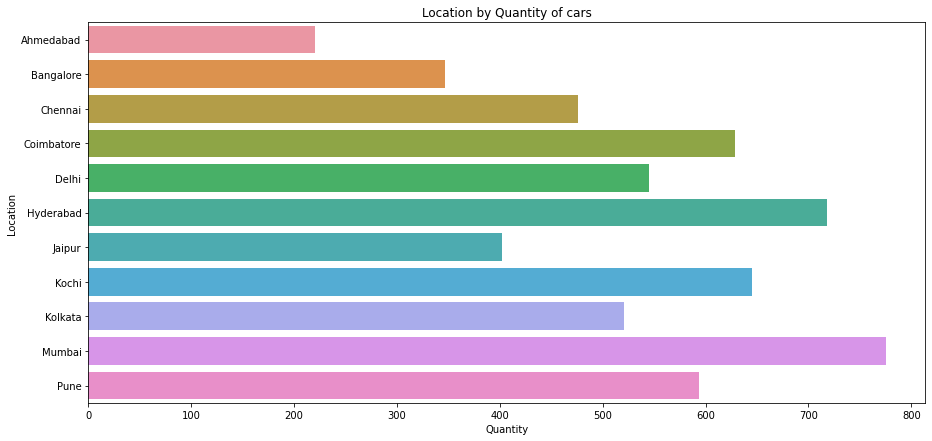

In [271]:
locdata = train.Location.value_counts()
figure = plt.figure(figsize=(15,7))
sns.barplot(y=locdata.index, x=locdata.values)
plt.xticks()
plt.xlabel('Quantity')
plt.ylabel('Location')
plt.title('Location by Quantity of cars')
plt.show()

<h1>yearly distribution of cars per location<\h1>

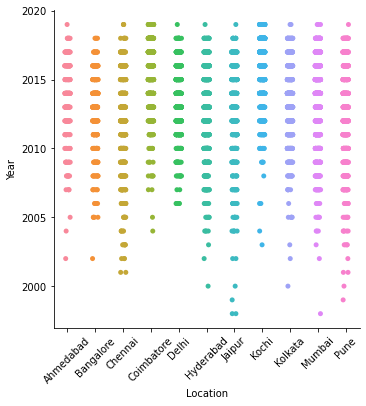

In [336]:
plot = sns.catplot(x="Location", y="Year", kind="strip", data=train)
plot.set_xticklabels(rotation=45)

<h1>Price distribution of cars as per location, Delhi and Combatore has high pricesd third owner car mostly Luxury cars<\h1>

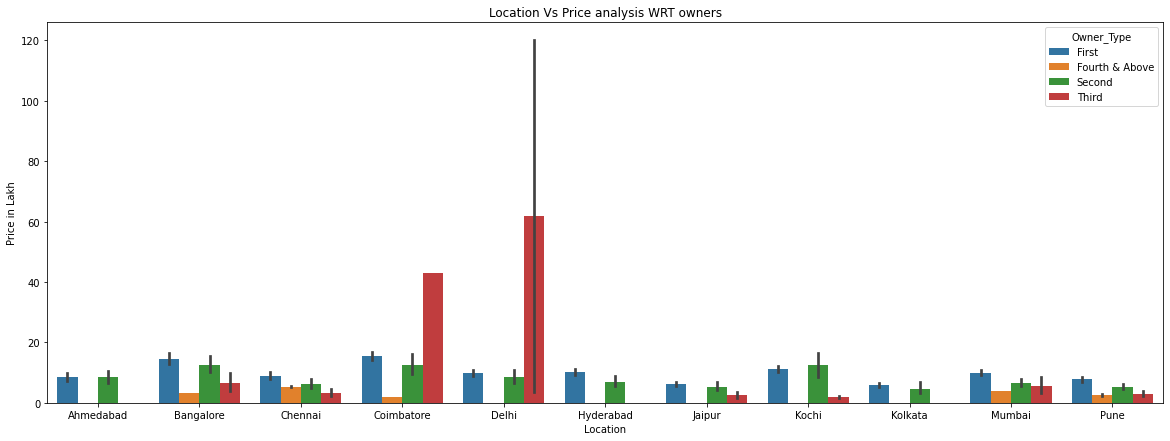

In [292]:
figure = plt.figure(figsize=(20,7))
sns.barplot(y="Price", x="Location",data = train,hue = "Owner_Type")
plt.xticks()
plt.xlabel('Location')
plt.ylabel('Price in Lakh')
plt.title('Location Vs Price analysis WRT owners')
plt.show()

<h1>Distribution of cars by their power with respect to transmission type<\h1>

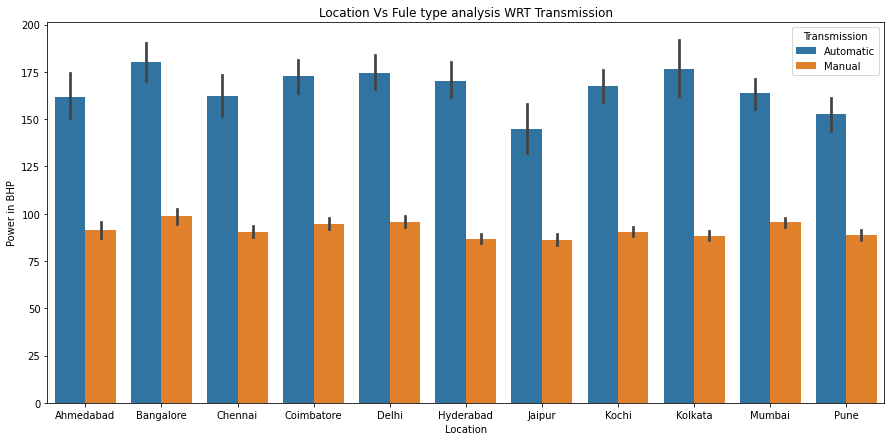

In [291]:
figure = plt.figure(figsize=(15,7))
sns.barplot(y="Power", x="Location",data = train,hue = "Transmission")
plt.xticks()
plt.xlabel('Location')
plt.ylabel('Power in BHP')
plt.title('Location Vs Fule type analysis WRT Transmission')
plt.show()

<h1>Price range of cars by their number of seat and type of transmission<\h1>

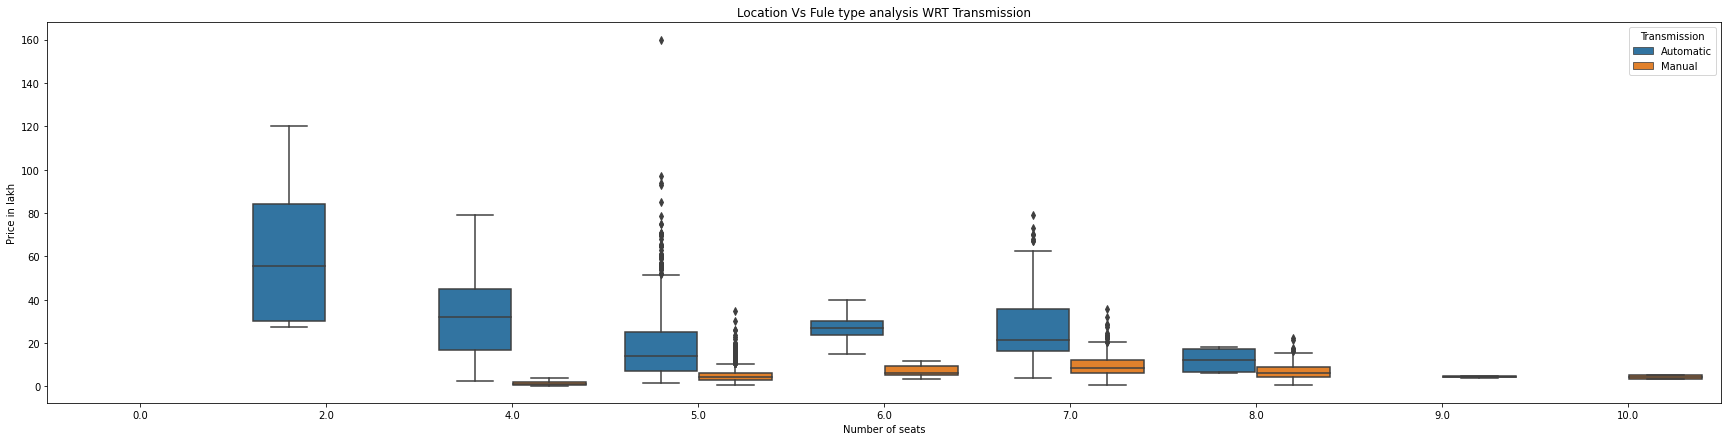

In [297]:
figure = plt.figure(figsize=(30,7))
sns.boxplot(y="Price", x="Seats",data = train,hue = "Transmission")
plt.xticks()
plt.xlabel('Number of seats')
plt.ylabel('Price in lakh')
plt.title('Location Vs Fule type analysis WRT Transmission')
plot.set_xticklabels(rotation=45)
plt.show()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import time

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5872 non-null   category
 1   Location           5872 non-null   category
 2   Year               5872 non-null   category
 3   Kilometers_Driven  5872 non-null   float64 
 4   Fuel_Type          5872 non-null   category
 5   Transmission       5872 non-null   category
 6   Owner_Type         5872 non-null   category
 7   Mileage            5872 non-null   float64 
 8   Engine             5872 non-null   float64 
 9   Power              5872 non-null   float64 
 10  Seats              5872 non-null   category
 11  Price              5872 non-null   float64 
dtypes: category(7), float64(5)
memory usage: 577.8 KB


<h1>Data preprocessiing and transforming<\h1>

In [20]:
X = train.iloc[:,:-1]
y = train['Price']

numeric_features = ['Kilometers_Driven','Mileage','Engine','Power','Year']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['Name', 'Location','Fuel_Type','Transmission','Owner_Type','Seats']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

<h1>Prediction with varius base model with higest accuracy of 83% with Support vector regressor(SVR)<\h1>

In [327]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.LinearRegression()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


for item in classifiers:
    print(item)
    clf = item
    
    start=time.time()
    reg_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])
    
    reg_clf.fit(X_train, y_train)
    
    y_pred=reg_clf.predict(X_test)

    print("model score: %.3f" % reg_clf.score(X_test, y_test))
    
    end = time.time()

    print("Over all time taken : ", end-start)
    print("\n")



SVR()
model score: 0.834
Over all time taken :  3.9162240028381348


SGDRegressor()
model score: -4.381
Over all time taken :  0.1370079517364502


PassiveAggressiveRegressor()
model score: 0.844
Over all time taken :  0.17901039123535156


LinearRegression()
model score: 0.754
Over all time taken :  0.4560260772705078




In [23]:
#check the p value> 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

reg_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', linear_model.SGDRegressor())])
    
reg_clf.fit(X_train, y_train)
    
y_pred=reg_clf.predict(X_test)

In [24]:
y_pred

array([-25.00257852,  -8.27408457, -18.02787362, ...,  10.65810944,
        -6.0434251 ,  17.2264566 ])

In [25]:
print("model score: %.3f" % reg_clf.score(X_test, y_test))

model score: -9.120


In [26]:
X_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1872,Maruti Eeco 7 Seater Standard,Mumbai,2014,34669.0,Petrol,Manual,First,15.10,1196.0,73.0,7.0
3373,Honda City i-VTEC VX,Mumbai,2017,7500.0,Petrol,Manual,First,17.40,1497.0,117.3,5.0
4284,Toyota Innova Crysta 2.8 ZX AT,Delhi,2016,42000.0,Diesel,Automatic,First,11.36,2755.0,171.5,7.0
2304,BMW X1 sDrive 20d Sportline,Delhi,2015,49000.0,Diesel,Automatic,First,17.05,1995.0,184.0,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2748,Hyundai Creta 1.6 CRDi AT SX Plus,Coimbatore,2017,50170.0,Diesel,Automatic,First,17.01,1582.0,126.2,5.0
4979,Mahindra XUV500 W6 2WD,Delhi,2015,37000.0,Diesel,Manual,First,15.10,2179.0,140.0,7.0
4806,Maruti Omni 8 Seater BSII,Jaipur,2004,66624.0,Petrol,Manual,Third,19.70,796.0,35.0,8.0
4526,Toyota Innova 2.5 V Diesel 8-seater,Chennai,2015,100000.0,Diesel,Manual,First,12.80,2494.0,102.0,8.0


In [38]:
numeric_features1 = ['Kilometers_Driven','Mileage','Engine','Year']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features1 = ['Name', 'Location','Fuel_Type','Transmission','Owner_Type','Seats']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features1),
        ('cat', categorical_transformer, categorical_features1)])

In [39]:
X1 = train.drop(["Price","Power"],axis=1)
y1 = train['Price']





#check the p value> 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

reg_clf = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', linear_model.SGDRegressor())])
    
reg_clf.fit(X_train, y_train)
    
y_pred=reg_clf.predict(X_test)

In [41]:
print("model score: %.3f" % reg_clf.score(X_test, y_test))

model score: -1.010


In [42]:
print(y_pred)

[-6.20080508  7.76345285  9.45050533 ... 11.85221791 12.01161504
 -2.36884372]


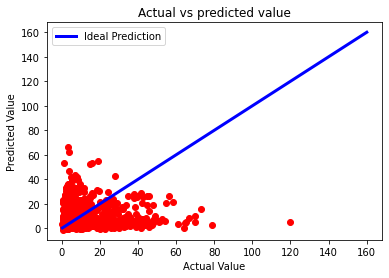

In [79]:
x_pred = np.linspace(0, 40, 1468)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(X_test["Name"]))

#plt.scatter(X_test, y_test, color = "red")
plt.scatter(y_test, y_pred, color = "red")

plt.title("Actual vs predicted value")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k', linewidth=3, label='Ideal Prediction',color = "blue")
plt.legend()
plt.show()

(array([  4.,  27., 190., 529., 456., 176.,  61.,  17.,   4.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-43.69199817, -30.67303817, -17.65407818,  -4.63511819,
          8.38384181,  21.4028018 ,  34.42176179,  47.44072179,
         60.45968178,  73.47864177,  86.49760177,  99.51656176,
        112.53552176, 125.55448175, 138.57344174, 151.59240174,
        164.61136173, 177.63032172, 190.64928172, 203.66824171,
        216.6872017 ]),
 <BarContainer object of 20 artists>)

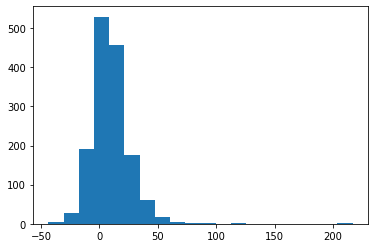

In [61]:
plt.hist(y_pred,bins=20)

(array([659., 441., 119.,  66.,  41.,  41.,  38.,  15.,  11.,  10.,   5.,
          7.,   5.,   3.,   3.,   1.,   1.,   0.,   1.,   1.]),
 array([ 0.53 ,  5.187,  9.844, 14.501, 19.158, 23.815, 28.472, 33.129,
        37.786, 42.443, 47.1  , 51.757, 56.414, 61.071, 65.728, 70.385,
        75.042, 79.699, 84.356, 89.013, 93.67 ]),
 <BarContainer object of 20 artists>)

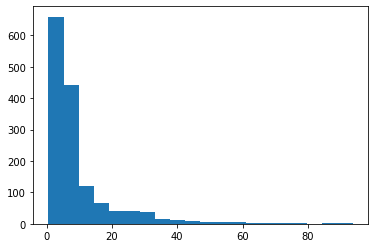

In [63]:
plt.hist(y_test,bins=20)

In [65]:
from scipy import stats

print(stats.ttest_ind(y_test,y_pred))

Ttest_indResult(statistic=-0.28444247412797097, pvalue=0.7760913860457495)


In [68]:
categorical_features1 = ['Name', 'Location','Fuel_Type','Transmission','Owner_Type','Seats']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor2 = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features1)])

In [74]:
#check the p value> 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

reg_clf2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('classifier', linear_model.SGDRegressor(max_iter=5000))])
    
reg_clf2.fit(X_train, y_train)
    
y_pred2=reg_clf2.predict(X_test)

In [83]:
print("model score: %.3f" % reg_clf2.score(X_test, y_test))

model score: 0.759


(array([188., 429., 337., 146.,  79.,  84.,  67.,  43.,  28.,  22.,  16.,
          8.,   8.,   3.,   2.,   3.,   2.,   2.,   0.,   1.]),
 array([-0.98049254,  2.33789459,  5.65628173,  8.97466886, 12.29305599,
        15.61144313, 18.92983026, 22.24821739, 25.56660453, 28.88499166,
        32.20337879, 35.52176593, 38.84015306, 42.15854019, 45.47692733,
        48.79531446, 52.11370159, 55.43208873, 58.75047586, 62.06886299,
        65.38725013]),
 <BarContainer object of 20 artists>)

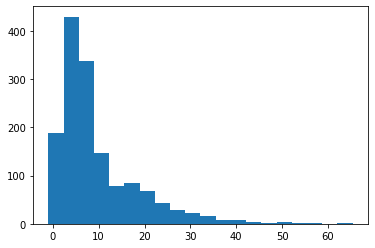

In [84]:
plt.hist(y_pred2,bins=20)

In [76]:
from scipy import stats

print(stats.ttest_ind(y_test,y_pred2))

Ttest_indResult(statistic=-0.07449365267195329, pvalue=0.9406226698773898)
